In [1]:
import pandas as pd

# load data
df = pd.read_csv('data/train_data_lemma.csv')
# quantify missing
display(pd.DataFrame({'Missing':len(df[df['review_text'].isna()]),
        'Present':len(df.loc[df['review_text'].str.split().str.len()>0]),
       'Total':len(df)},index = ['Review Text']))

# drop entries with no review text
#df = df[df['review_text'].str.split().str.len()>=1]
display(df.head())

from sklearn.feature_extraction.text import CountVectorizer

# initialise count vectoriser
count_vec = CountVectorizer()
bow = count_vec.fit_transform(df['review_text'])

print(f"Reviews in sample = {bow.shape[0]}")
print(f"Unique words in sample = {bow.shape[1]}")

,Missing,Present,Total
Review Text,0,36861,36861


,date,review_text,classification
0,2022-11-01,many issue end like other claim lot fun cod gl...,Positive
1,2022-10-30,crash nikita mazepin f,Negative
2,2022-11-11,say buy single player campaign get single play...,Negative
3,2022-10-28,video movie,Positive
4,2022-11-07,mashallah,Positive


Reviews in sample = 36861
Unique words in sample = 20365


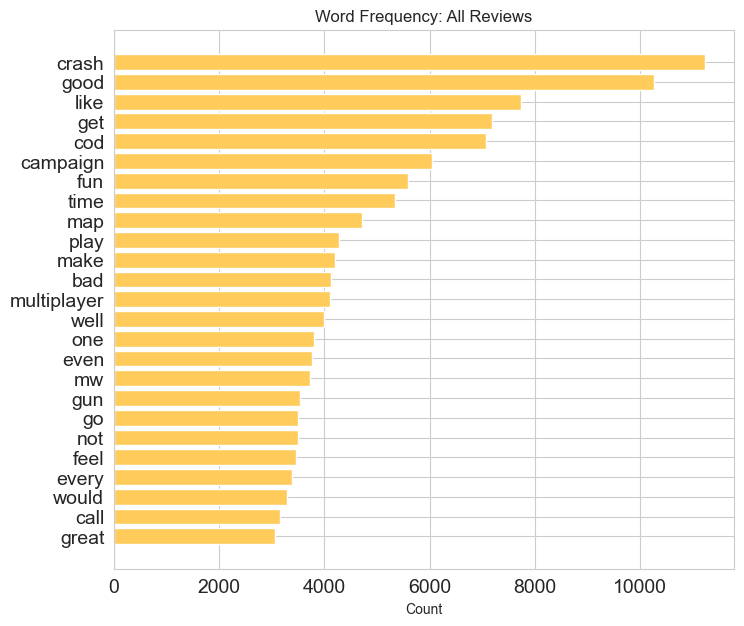

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
df_all = pd.DataFrame({"Count" :bow.sum(axis=0).tolist()[0]}, 
             index = count_vec.get_feature_names_out()).sort_values(ascending = False, by = ("Count"))

fig, ax = plt.subplots(figsize=(8,7))
ax.barh(df_all.index[:25],df_all.Count[:25],align='center',color="#ffcc5c")
ax.invert_yaxis()
ax.tick_params(labelsize=14)
ax.set(title="Word Frequency: All Reviews",
       xlabel="Count");

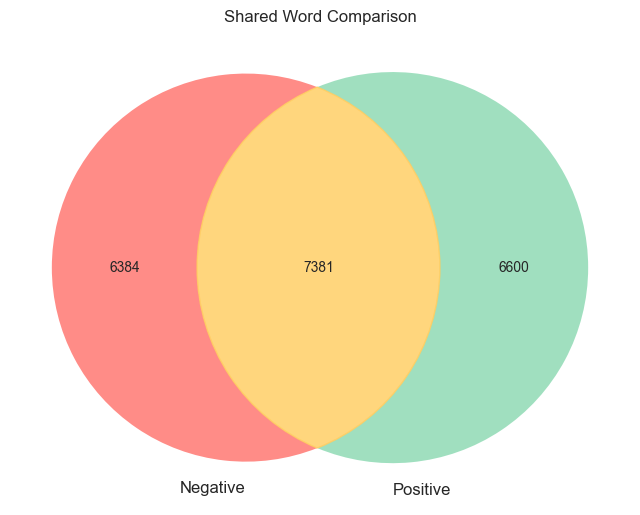

In [3]:
# create postive and negative bag of words               
pos_count_vec = CountVectorizer()
pos_bow = pos_count_vec.fit_transform(df.loc[:,'review_text'][df.classification == 'Positive'])

neg_count_vec = CountVectorizer()
neg_bow = neg_count_vec.fit_transform(df.loc[:,'review_text'][df.classification == 'Negative'])

from matplotlib_venn import venn2, venn2_circles
plt.subplots(figsize=(8,7))
v=venn2([set(neg_count_vec.get_feature_names_out()), set(pos_count_vec.get_feature_names_out())],set_labels = ("Negative", "Positive"),
      set_colors = ("#FF6F69","#88D8B0"),
      alpha = 0.8)
v.get_patch_by_id('11').set_color("#ffcc5c")
plt.title("Shared Word Comparison");

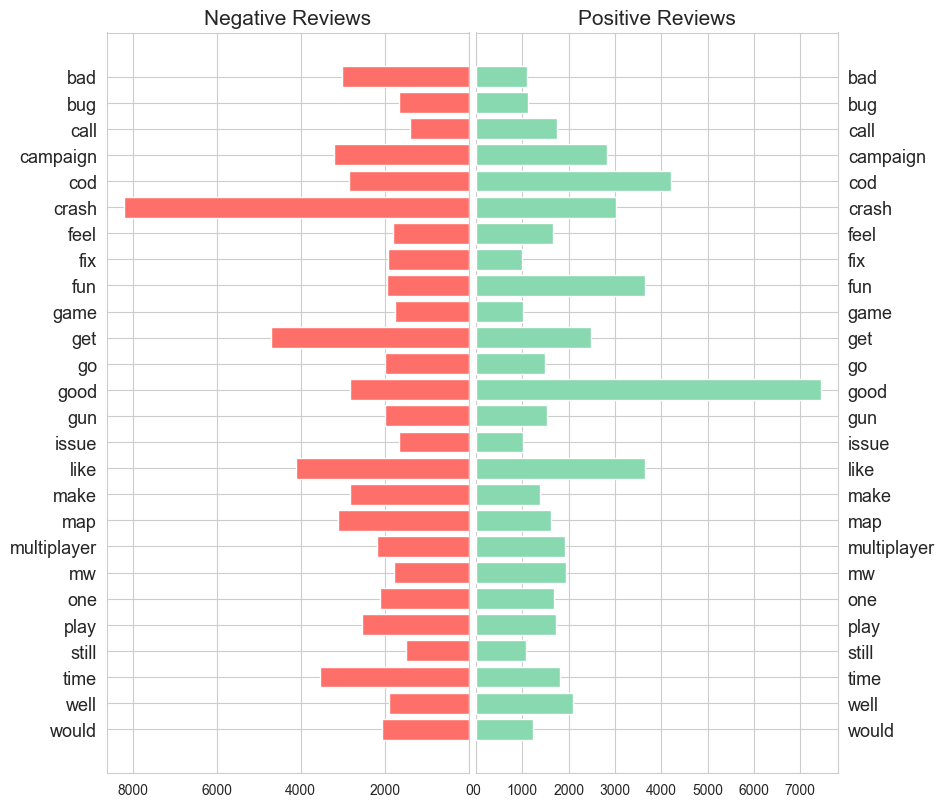

In [4]:
# create df of most frequent pos and neg nouns
df_pos = pd.DataFrame({'Count': pos_bow.sum(axis=0).tolist()[0]},
                      index= pos_count_vec.get_feature_names_out()).sort_values(ascending = False, by = 'Count')[:40]
df_neg = pd.DataFrame({'Count': neg_bow.sum(axis=0).tolist()[0]},
                      index= neg_count_vec.get_feature_names_out()).sort_values(ascending = False, by = 'Count')[:40]

# restrict each to nouns common to both
df_pos = df_pos.loc[df_pos.index.intersection(df_neg.index),].sort_index()
df_neg = df_neg.loc[df_neg.index.intersection(df_pos.index),].sort_index()


#create plotting space
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,8),ncols=2)
fig.tight_layout()

#left plot
ax[0].barh(df_neg.index, df_neg.Count, align='center',zorder=10,color = '#FF6F69')
ax[0].set_title('Negative Reviews',fontsize=15)
ax[0].invert_xaxis()
ax[0].invert_yaxis()
ax[0].tick_params(axis='y',labelsize=13)

#right plot
ax[1].barh(df_pos.index, df_pos.Count, align='center',zorder=10,color = '#88D8B0')
ax[1].set_title('Positive Reviews',fontsize=15)
ax[1].invert_yaxis()
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y',labelsize=13, right=False)

plt.subplots_adjust(wspace=0.02)